📓 STRUCTURE RECOMMANDÉE DU NOTEBOOK

Nom du fichier :

🧩 CELLULE 1 — TITRE & CONTEXTE

# Condition Monitoring of Hydraulic Systems
## Data Collection, Transformation & Exploratory Data Analysis (EDA)

### Objectif
Ce notebook présente les étapes de :
- recueil des données brutes (.txt),
- transformation en un dataset exploitable,
- normalisation,
- analyse exploratoire,
- visualisation des données,

dans le cadre d’un projet de maintenance prédictive visant à prédire
la condition de la valve hydraulique.

🧩 CELLULE 2 — IMPORTS & CONFIGURATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

plt.style.use("seaborn-v0_8")
sns.set_context("notebook")


🧩 CELLULE 3 — DESCRIPTION DES DONNÉES

## 1. Description du jeu de données

Le jeu de données est issu d’un banc d’essai hydraulique instrumenté.
Chaque observation correspond à un cycle de fonctionnement de 60 secondes.

Les données sont fournies sous forme de fichiers texte (.txt) :
- PS1–PS6 : pressions (100 Hz)
- FS1–FS2 : débits (10 Hz)
- TS1–TS4 : températures (1 Hz)
- VS1 : vibration (1 Hz)
- EPS1 : puissance moteur (100 Hz)
- CE, CP, SE : capteurs virtuels
- profile.txt : état réel des composants (labels)


🧩 CELLULE 4 — CHARGEMENT D’UN FICHIER EXEMPLE

In [ ]:
df_PS1 = pd.read_csv("data/PS1.txt", sep="\t", header=None)
df_PS1.shape

df_PS1.head()


,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,151.47,151.45,151.52,151.27,150.80,150.69,153.89,154.67,152.88,153.82,...,151.16,151.19,151.25,151.16,151.10,151.16,151.14,151.10,151.21,151.19
1,151.11,151.12,151.16,150.92,150.70,150.62,152.40,153.21,152.81,153.53,...,150.82,150.82,150.86,150.80,150.73,150.79,150.84,150.79,150.80,150.86
2,150.81,150.79,150.84,150.65,150.35,150.23,152.03,152.81,152.44,153.27,...,150.49,150.44,150.47,150.46,150.38,150.47,150.50,150.43,150.54,150.62
3,150.48,150.47,150.52,150.31,150.04,149.98,151.63,152.48,152.24,152.94,...,150.34,150.30,150.28,150.38,150.41,150.33,150.31,150.31,150.25,150.28
4,150.41,150.35,150.24,150.12,149.87,149.71,151.64,152.37,151.78,152.68,...,150.31,150.20,150.17,150.28,150.31,150.25,150.27,150.22,150.13,150.19


🧩 CELLULE 5 — OBSERVATION DES SIGNAUX BRUTS (Graphique)

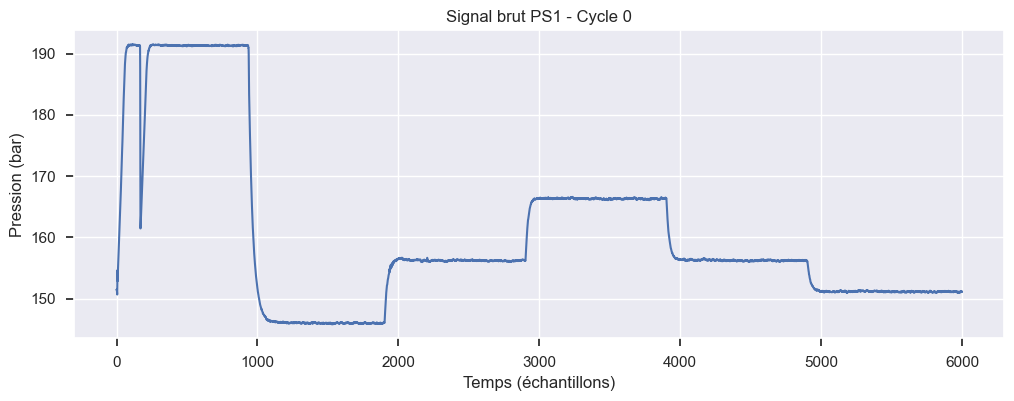

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(df_PS1.iloc[0])
plt.title("Signal brut PS1 - Cycle 0")
plt.xlabel("Temps (échantillons)")
plt.ylabel("Pression (bar)")
plt.show()


🧩 CELLULE 6 — TRANSFORMATION DES SIGNAUX (Feature Engineering)

In [ ]:
def extract_stat_features(df, sensor_name):
    return pd.DataFrame({
        f"{sensor_name}_mean": df.mean(axis=1),
        f"{sensor_name}_std": df.std(axis=1),
        f"{sensor_name}_min": df.min(axis=1),
        f"{sensor_name}_max": df.max(axis=1),
    })


🧩 CELLULE 7 — EXTRACTION DES FEATURES POUR TOUS LES CAPTEURS

In [ ]:
sensors = [
    "PS1","PS2","PS3","PS4","PS5","PS6",
    "FS1","FS2",
    "TS1","TS2","TS3","TS4",
    "VS1","EPS1",
    "CE","CP","SE"
]

features = []

for sensor in sensors:
    df = pd.read_csv(f"data/{sensor}.txt", sep="\t", header=None)
    feat = extract_stat_features(df, sensor)
    features.append(feat)

x = pd.concat(features, axis=1)
x["cycle_id"] = x.index
print(x.head())


     PS1_mean    PS1_std  PS1_min  PS1_max    PS2_mean    PS2_std  PS2_min  \
0  160.673492  13.939309   145.83   191.51  109.466914  47.114508      0.0   
1  160.603320  14.118967   145.73   191.47  109.354890  47.045611      0.0   
2  160.347720  14.192619   145.37   191.41  109.158845  46.992060      0.0   
3  160.188088  14.227803   145.14   191.34  109.064807  46.972221      0.0   
4  160.000472  14.276434   144.95   191.41  108.931434  46.874946      0.0   

   PS2_max  PS3_mean   PS3_std  ...  CE_max   CP_mean    CP_std  CP_min  \
0   156.99  1.991475  0.945705  ...  47.438  1.862750  0.279385   1.383   
1   157.56  1.976234  0.941967  ...  29.208  1.255550  0.074605   1.147   
2   156.97  1.972224  0.943501  ...  23.554  1.113217  0.023263   1.076   
3   156.44  1.946575  0.935534  ...  21.565  1.062150  0.024621   1.022   
4   158.13  1.922707  0.930335  ...  20.460  1.070467  0.021477   1.016   

   CP_max    SE_mean     SE_std  SE_min  SE_max  cycle_id  
0   2.188  59.157183

🧩 CELLULE 8 — CHARGEMENT DU FICHIER PROFILE.TXT

In [ ]:
profile = pd.read_csv("data/profile.txt", sep="\t", header=None)
profile.columns = [
    "cooler_condition",
    "valve_condition",
    "pump_leakage",
    "accumulator_pressure",
    "stable_flag"
]
profile["cycle_id"] = profile.index

profile.head()


,cooler_condition,valve_condition,pump_leakage,accumulator_pressure,stable_flag,cycle_id
0,3,100,0,130,1,0
1,3,100,0,130,1,1
2,3,100,0,130,1,2
3,3,100,0,130,1,3
4,3,100,0,130,1,4


CELLULE 9 — DATASET FINAL (FEATURES + LABELS)

In [ ]:
dataset = x.merge(profile, on="cycle_id")
print(dataset.head(85))


      PS1_mean    PS1_std  PS1_min  PS1_max    PS2_mean    PS2_std  PS2_min  \
0   160.673492  13.939309   145.83   191.51  109.466914  47.114508      0.0   
1   160.603320  14.118967   145.73   191.47  109.354890  47.045611      0.0   
2   160.347720  14.192619   145.37   191.41  109.158845  46.992060      0.0   
3   160.188088  14.227803   145.14   191.34  109.064807  46.972221      0.0   
4   160.000472  14.276434   144.95   191.41  108.931434  46.874946      0.0   
..         ...        ...      ...      ...         ...        ...      ...   
80  157.250447  14.922315   141.21   190.54  106.582799  45.904899      0.0   
81  157.236308  14.923756   141.69   190.49  106.592101  45.898803      0.0   
82  157.255838  14.918300   141.64   190.41  106.597709  45.913605      0.0   
83  157.230483  14.930041   141.59   190.41  106.588876  45.893688      0.0   
84  157.224840  14.928006   141.32   190.39  106.561199  45.900567      0.0   

    PS2_max  PS3_mean   PS3_std  ...    SE_mean    

🧩 CELLULE 10 — SAUVEGARDE EN CSV

In [ ]:
dataset.to_csv("dataset_hydraulic_ml.csv", index=False)


🧩 CELLULE 11 — NORMALISATION DES DONNÉES

In [ ]:
feature_cols = dataset.columns.drop([
    "cycle_id",
    "cooler_condition",
    "valve_condition",
    "pump_leakage",
    "accumulator_pressure",
    "stable_flag"
])

scaler = StandardScaler()

dataset_scaled = dataset.copy()

dataset_scaled[feature_cols] = scaler.fit_transform(dataset[feature_cols])

print(dataset_scaled.head(25))


    PS1_mean   PS1_std   PS1_min   PS1_max  PS2_mean   PS2_std  PS2_min  \
0   0.040052 -0.656258  1.073368  1.004103  0.017452 -0.190038      0.0   
1   0.025116 -0.569368  1.027831  0.937749 -0.005018 -0.211100      0.0   
2  -0.029286 -0.533747  0.863898  0.838219 -0.044341 -0.227470      0.0   
3  -0.063262 -0.516730  0.759163  0.722101 -0.063204 -0.233535      0.0   
4  -0.103194 -0.493210  0.672643  0.838219 -0.089956 -0.263272      0.0   
5  -0.120277 -0.493386  0.563354  0.622571 -0.098732 -0.272653      0.0   
6  -0.172962 -0.447417  0.463172  0.473276 -0.141099 -0.289426      0.0   
7  -0.185355 -0.439492  0.426743  0.440099 -0.146057 -0.284152      0.0   
8  -0.214877 -0.418799  0.294685  0.390334 -0.170530 -0.295456      0.0   
9  -0.222911 -0.425944  0.312900  0.423511 -0.174311 -0.300893      0.0   
10 -0.247652 -0.408423  0.267363  0.423511 -0.188961 -0.323460      0.0   
11 -0.266093 -0.401546  0.208165  0.257627 -0.213245 -0.324189      0.0   
12 -0.287370 -0.402367  0

🧩 CELLULE 12 — ANALYSE STATISTIQUE (EDA)

In [ ]:
print(dataset.head(35))

# dataset.describe()


      PS1_mean    PS1_std  PS1_min  PS1_max    PS2_mean    PS2_std  PS2_min  \
0   160.673492  13.939309   145.83   191.51  109.466914  47.114508      0.0   
1   160.603320  14.118967   145.73   191.47  109.354890  47.045611      0.0   
2   160.347720  14.192619   145.37   191.41  109.158845  46.992060      0.0   
3   160.188088  14.227803   145.14   191.34  109.064807  46.972221      0.0   
4   160.000472  14.276434   144.95   191.41  108.931434  46.874946      0.0   
5   159.920210  14.276071   144.71   191.28  108.887682  46.844259      0.0   
6   159.672675  14.371119   144.49   191.19  108.676466  46.789389      0.0   
7   159.614452  14.387504   144.41   191.17  108.651745  46.806641      0.0   
8   159.475745  14.430290   144.12   191.14  108.529738  46.769665      0.0   
9   159.437997  14.415518   144.16   191.16  108.510885  46.751877      0.0   
10  159.321757  14.451744   144.06   191.16  108.437852  46.678059      0.0   
11  159.235113  14.465964   143.93   191.06  108.316

🧩 CELLULE 13 — ANALYSE PAR ÉTAT DE LA VALVE

In [ ]:
dataset["valve_optimal"] = (dataset["valve_condition"] == 100)

dataset.groupby("valve_optimal")[feature_cols].mean()


,PS1_mean,PS1_std,PS1_min,PS1_max,PS2_mean,PS2_std,PS2_min,PS2_max,PS3_mean,PS3_std,...,CE_min,CE_max,CP_mean,CP_std,CP_min,CP_max,SE_mean,SE_std,SE_min,SE_max
valve_optimal,,,,,,,,,,,,,,,,,,,,,
False,161.286461,15.636849,143.360741,190.805861,110.013933,48.449172,0.0,166.471833,1.707129,0.902602,...,30.823455,31.901817,1.806144,0.022371,1.767679,1.853447,53.056652,24.278480,0.0,80.090967
True,159.716214,14.969214,143.580507,190.999573,108.771240,47.051672,0.0,166.567253,1.797482,0.896201,...,30.749387,31.859668,1.810562,0.023000,1.770449,1.857996,57.429897,24.032728,0.0,79.768351


🧩 CELLULE 14 — VISUALISATION : DISTRIBUTIONS

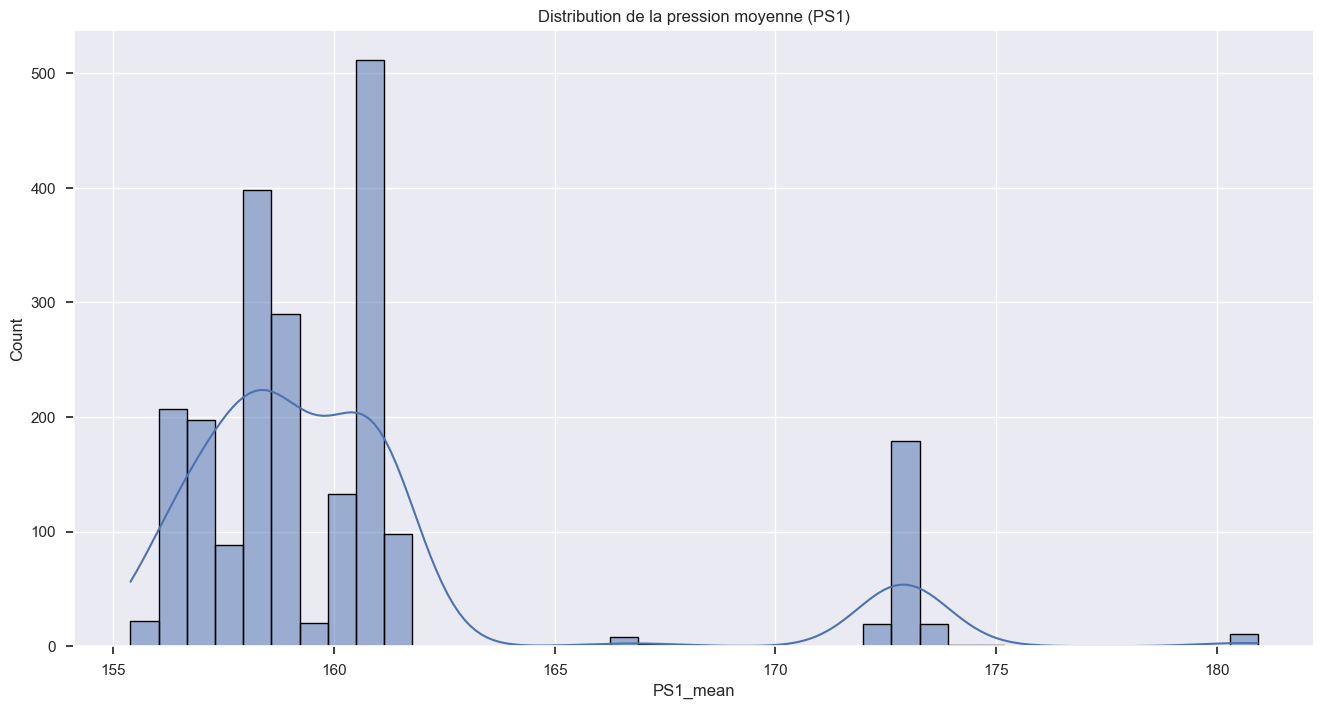

In [ ]:
plt.figure(figsize=(16, 8))
sns.histplot(dataset["PS1_mean"], bins=40, kde=True)
plt.title("Distribution de la pression moyenne (PS1)")
plt.show()


🧩 CELLULE 15 — BOXPLOT : VALVE OPTIMALE VS NON

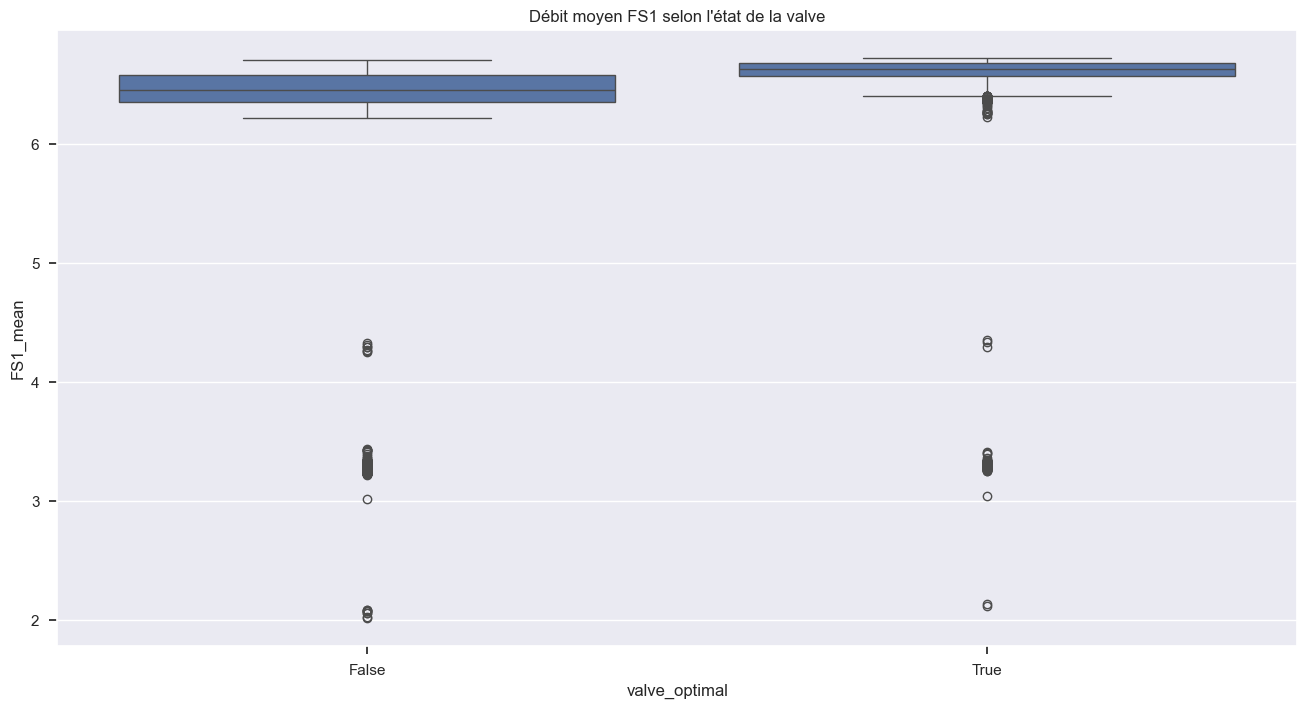

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(x="valve_optimal", y="FS1_mean", data=dataset) 
plt.title("Débit moyen FS1 selon l'état de la valve")
plt.show()

🧩 CELLULE 16 — MATRICE DE CORRÉLATION

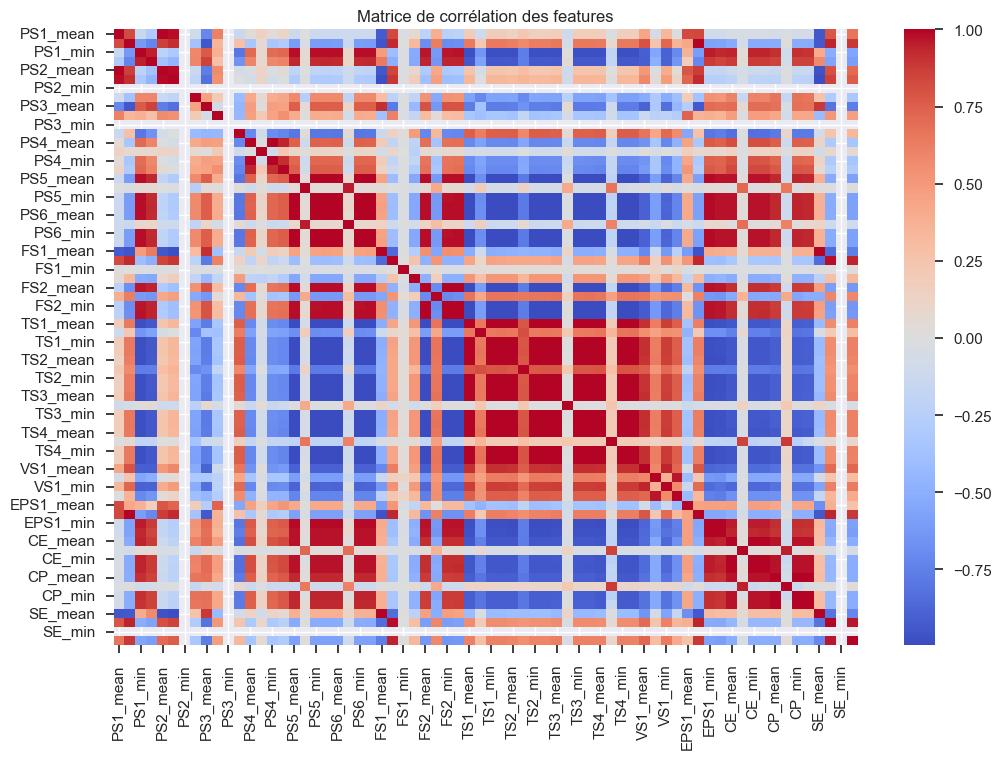

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset[feature_cols].corr(), cmap="coolwarm")
plt.title("Matrice de corrélation des features")
plt.show()


🧩 CELLULE 17 — CONCLUSION

## Conclusion

Cette phase de recueil, transformation et analyse exploratoire a permis :
- de structurer les données brutes multi-capteurs,
- de réduire fortement la dimension des signaux,
- d’identifier des variables discriminantes pour l’état de la valve,
- de préparer un dataset propre pour la phase de modélisation.

Les étapes suivantes consisteront à construire, évaluer et déployer un modèle
de Machine Learning pour la maintenance prédictive.
un systeme de streamlit pour un analyse de données rapide et sure

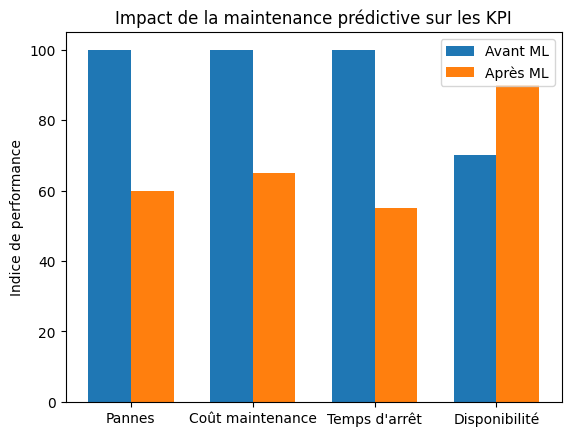

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

kpi = [
    "Pannes",
    "Coût maintenance",
    "Temps d'arrêt",
    "Disponibilité"
]

avant = [100, 100, 100, 70]     # Maintenance corrective (référence)
apres = [60, 65, 55, 90]        # Maintenance prédictive

x = np.arange(len(kpi))
width = 0.35

plt.figure()
plt.bar(x - width/2, avant, width, label="Avant ML")
plt.bar(x + width/2, apres, width, label="Après ML")

plt.xticks(x, kpi)
plt.ylabel("Indice de performance")
plt.title("Impact de la maintenance prédictive sur les KPI")
plt.legend()

plt.show()